## Before running the functions, please execute the following code blocks.

In [ ]:
# You can skip this part if you are not using google colab
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Gen Slang Corpus Lib"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1PKc7MNt4hzV7Nr7tiSjwPm5SM9U-I9gp/Gen Slang Corpus Lib


### Import and dowload the required libraries

In [13]:
!pip install dash
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [14]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import networkx as nx
from dash import Dash, dcc, html
import plotly.graph_objects as go

### **Load the TSV file from Google Drive**

In [15]:
# Specify the path to your TSV file
file_path = '/content/drive/MyDrive/Gen Slang Corpus Lib/Gen_slang_dictionary.tsv'

# Load the TSV file into a pandas DataFrame
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataframe
df.head()

,Slang/Phrase,Gen Era,POS,Meaning,Origin,Origin_Key,Synonym,Use it in a sentence,Formal sample sentence,Source
0,(its) giving --,Gen Alpha,VB,"A phrase used to describe the vibe, energy, or...","Popularized in LGBTQ+ and Black communities, f...","LGBTQ+, Black Community, TikTok, Twitter","exuding, radiating, channeling",Yzére's new scarf is giving Parisian art critic.,Yzére's new scarf exudes Parisian art critic.,[2]
1,alpha,Gen Alpha,NN,"Used to describe a leader, dominant personalit...","Originally stemming from zoology, the term evo...","Zoology, Gaming, Self-help","topdog, leader",I can say Charl is an alpha just by his domine...,I can say Charl is a leader just by his domine...,[3]
2,ate,Gen Alpha,VB,Slang for performing exceptionally well or com...,Rooted in African American Vernacular English ...,AAVE,"Rocked, crushed it, nailed it",Leanne ate in that stunningly new dress.,Leanne looked absolutely stunning in that bran...,[2]
3,Aura/Negative Aura,Gen Alpha,NN,The perceived vibe or energy someone gives off...,Derived from spiritual and metaphysical termin...,Spiritual,"Vibe, energy, impression","I don't know why, but his aura feels off today.","I can't explain it, but his presence feels unu...",[3] [2]
4,Bed rot,Gen Z,VB,A state of lounging in bed for extended period...,Social media platforms like TikTok in the earl...,TikTok,"Lazy day, slump, hibernation",I haven't done anything but bedrot these past ...,I haven't done anything but lie in bed feeling...,NaN


## **Searching Algoritm where source is Tab Separated Values**

In [ ]:
def load_corpus(file_path):
    corpus = []
    with open(file_path, newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter='\t')
        reader.fieldnames = [field.strip() for field in reader.fieldnames]
        for row in reader:
            corpus.append(row)
    return corpus


def search_corpus(corpus, query):
    results = []
    for entry in corpus:
        if query.lower() in entry['Slang/Phrase'].lower() or query.lower() in entry['Meaning'].lower() or query.lower() in entry['Synonym'].lower():
            results.append(entry)
    return results


def print_search_results(results):
    print("\n")
    if results:
        for i, result in enumerate(results, 1):
            print(f"Result {i}:")
            for key, value in result.items():
                print(f"{key}: {value}")
            print("\n" + "-" * 40 + "\n")
    else:
        print("No results found.")

def list_terms_by_era(df, era):
    if era == 1:
        era_df = df[df['Gen Era'] == "Gen Z"]
        print(f"\nTerms for Gen Z:\n")
        print(era_df[['Slang/Phrase']])
    elif era == 2:
        era_df = df[df['Gen Era'] == "Gen Alpha"]
        print(f"\nTerms for Gen Alpha:\n")
        print(era_df[['Slang/Phrase']])
    elif era == 3:  # Both Gen Z and Gen Alpha
        era_df = df[df['Gen Era'] == "Both"]
        print(f"\nTerms for Gen Z and Gen Alpha:\n")
        print(era_df[['Slang/Phrase']])
    elif era == 4: # All terms, regardless of era
        print(f"\nAll Terms:\n")
        print(df[['Slang/Phrase']])
    else:
        print("No Terms Found.")


def main():
    corpus = load_corpus(file_path)
    while True:
        print("\nChoose an option:")
        print("1. Search for a term ")
        print("2. List terms by generation")
        print("3. Exit")
        choice = input("Enter your choice (1-3): ")

        if choice == '1':
            query = input("\nEnter term, meaning or synonyms of the term: ").strip()
            results = search_corpus(corpus, query)
            print_search_results(results)
        elif choice == '2':
            print("\nEnter the generationn:")
            print("1. Gen Z")
            print("2. Gen Alpha")
            print("3. Popularized by both gen at the same time (Intersection)")
            print("4. All Terms")
            print("5. Back")
            era = int(input("Enter your choice (1-5): "))
            if era == 5:
              continue
            list_terms_by_era(df, era)
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")


if __name__ == '__main__':
    main()


Choose an option:
1. Search for a term 
2. List terms by generation
3. Exit
Enter your choice (1-3): 1

Enter term, meaning or synonyms of the term: sigma


Result 1:
Slang/Phrase: sigma
Gen Era: Gen Alpha
POS: NN
Meaning: Refers to a lone wolf type of personality, often used to describe someone who is independent, self-reliant and doesn’t conform to societal norms, particularly in men; someone who's more introverted, often described as the "lone wolf" who doesn't seek validation from others but still possesses strength and confidence.
Origin: Derived from "sigma male," a term popularized in internet manosphere culture. It has since become a meme.
Origin_Key: Meme
Synonym: Independent, nonconformist, lone wolf
Use it in a sentence: Joriz managed to do all that by himself. He is such a sigma.
Formal sample sentence: Joriz managed to do all that by himself. He is truly independent.
Source: [3] [2]

----------------------------------------

Result 2:
Slang/Phrase: what the sigma
Gen Era:

## **Web Networking**

In [16]:
# Extract relevant columns and remove missing values
subset = df[['Slang/Phrase', 'Gen Era', 'Origin_Key']].dropna()

### common terms

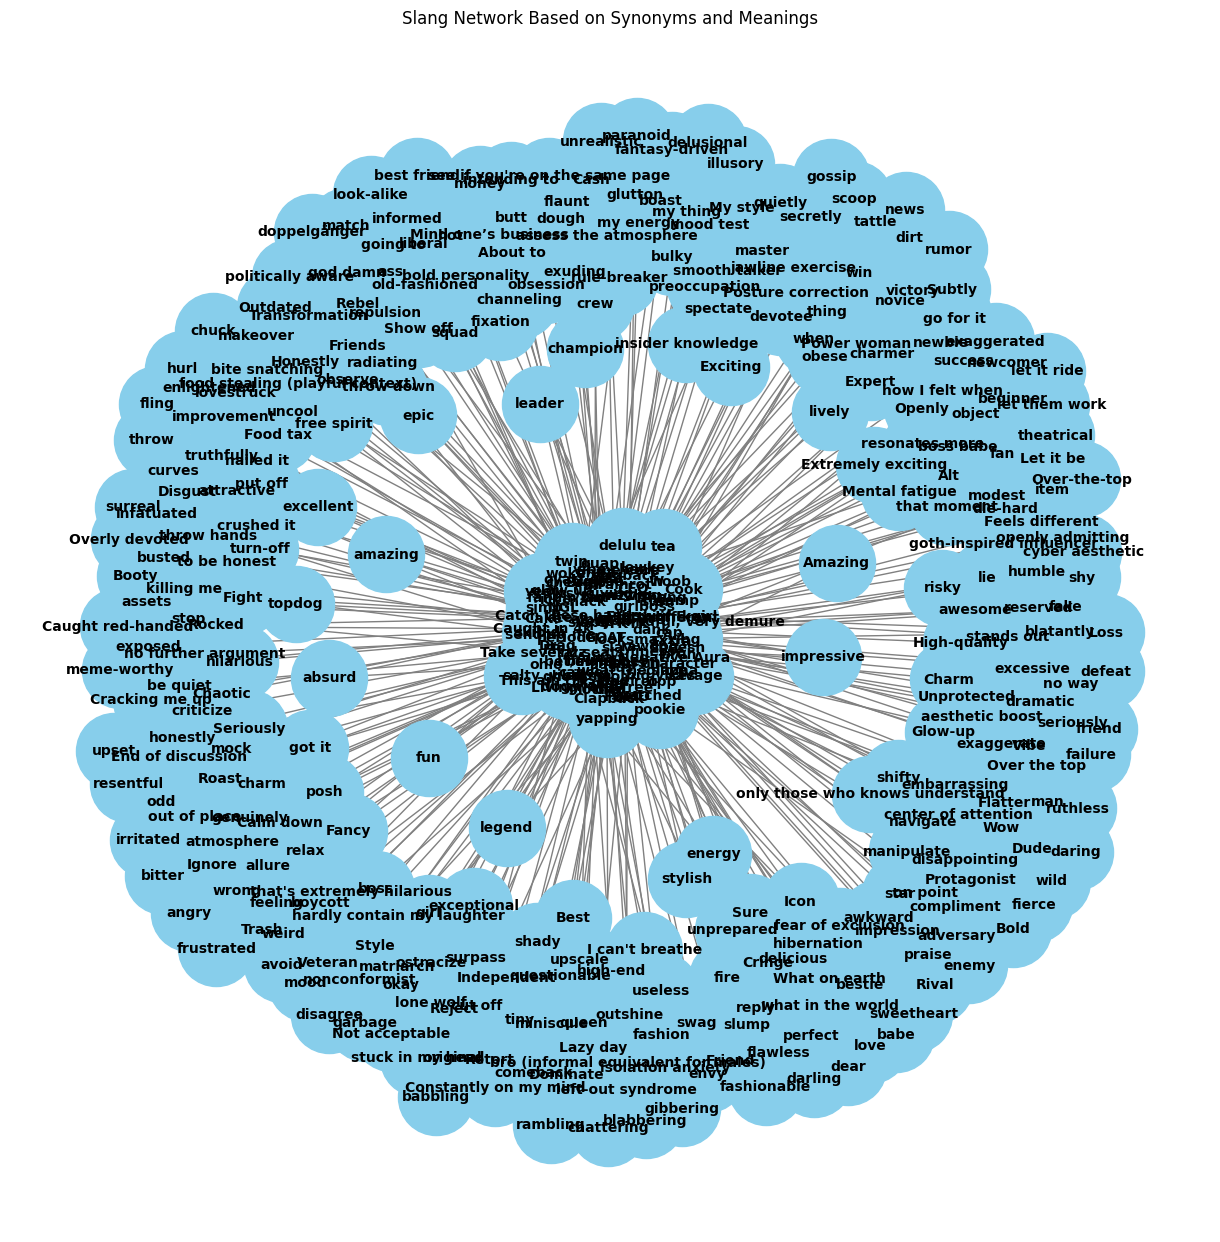

In [ ]:
# Load the TSV file into a list of dictionaries
def load_corpus(file_path):
    corpus = []
    with open(file_path, newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter='\t')

        # Strip extra spaces from column names
        reader.fieldnames = [field.strip() for field in reader.fieldnames]
        for row in reader:
            corpus.append(row)
    return corpus

# Function to create a web network based on synonyms and meanings
def create_network(corpus):
    G = nx.Graph()  # Create an empty graph

    for entry in corpus:
        slang = entry['Slang/Phrase']
        # meaning = entry['Meaning']
        synonyms = entry['Synonym'].split(',')  # Assuming synonyms are comma-separated

        # Add the slang as a node
        if slang not in G:
            G.add_node(slang)

        # Add edges between slang and its synonyms if they are not the same slang
        for synonym in synonyms:
            synonym = synonym.strip()  # Strip any extra spaces
            if synonym != slang:  # Avoid self-loop
                G.add_node(synonym)  # Ensure synonym is a node
                G.add_edge(slang, synonym)  # Add edge between slang and its synonym

        # Add edges between slang terms that share the same meaning
        for other_entry in corpus:
            # if other_entry != entry and meaning == other_entry['Meaning']:
            if other_entry != entry:
                other_slang = other_entry['Slang/Phrase']
                G.add_edge(slang, other_slang)  # Add edge between slang terms with the same meaning

    return G

# Function to visualize the network
def visualize_network(G):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # Layout for nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', font_size=10, node_size=3000, font_weight='bold', edge_color='gray')
    plt.title("Slang Network Based on Synonyms and Meanings")
    plt.show()

def main():
    # Load the corpus from the TSV file
    corpus = load_corpus(file_path)

    # Create a network from the corpus
    G = create_network(corpus)

    # Visualize the network
    visualize_network(G)

if __name__ == '__main__':
    main()


###
 Subgraph for Gen Era word network

### **Word Network with Linking Nodes**

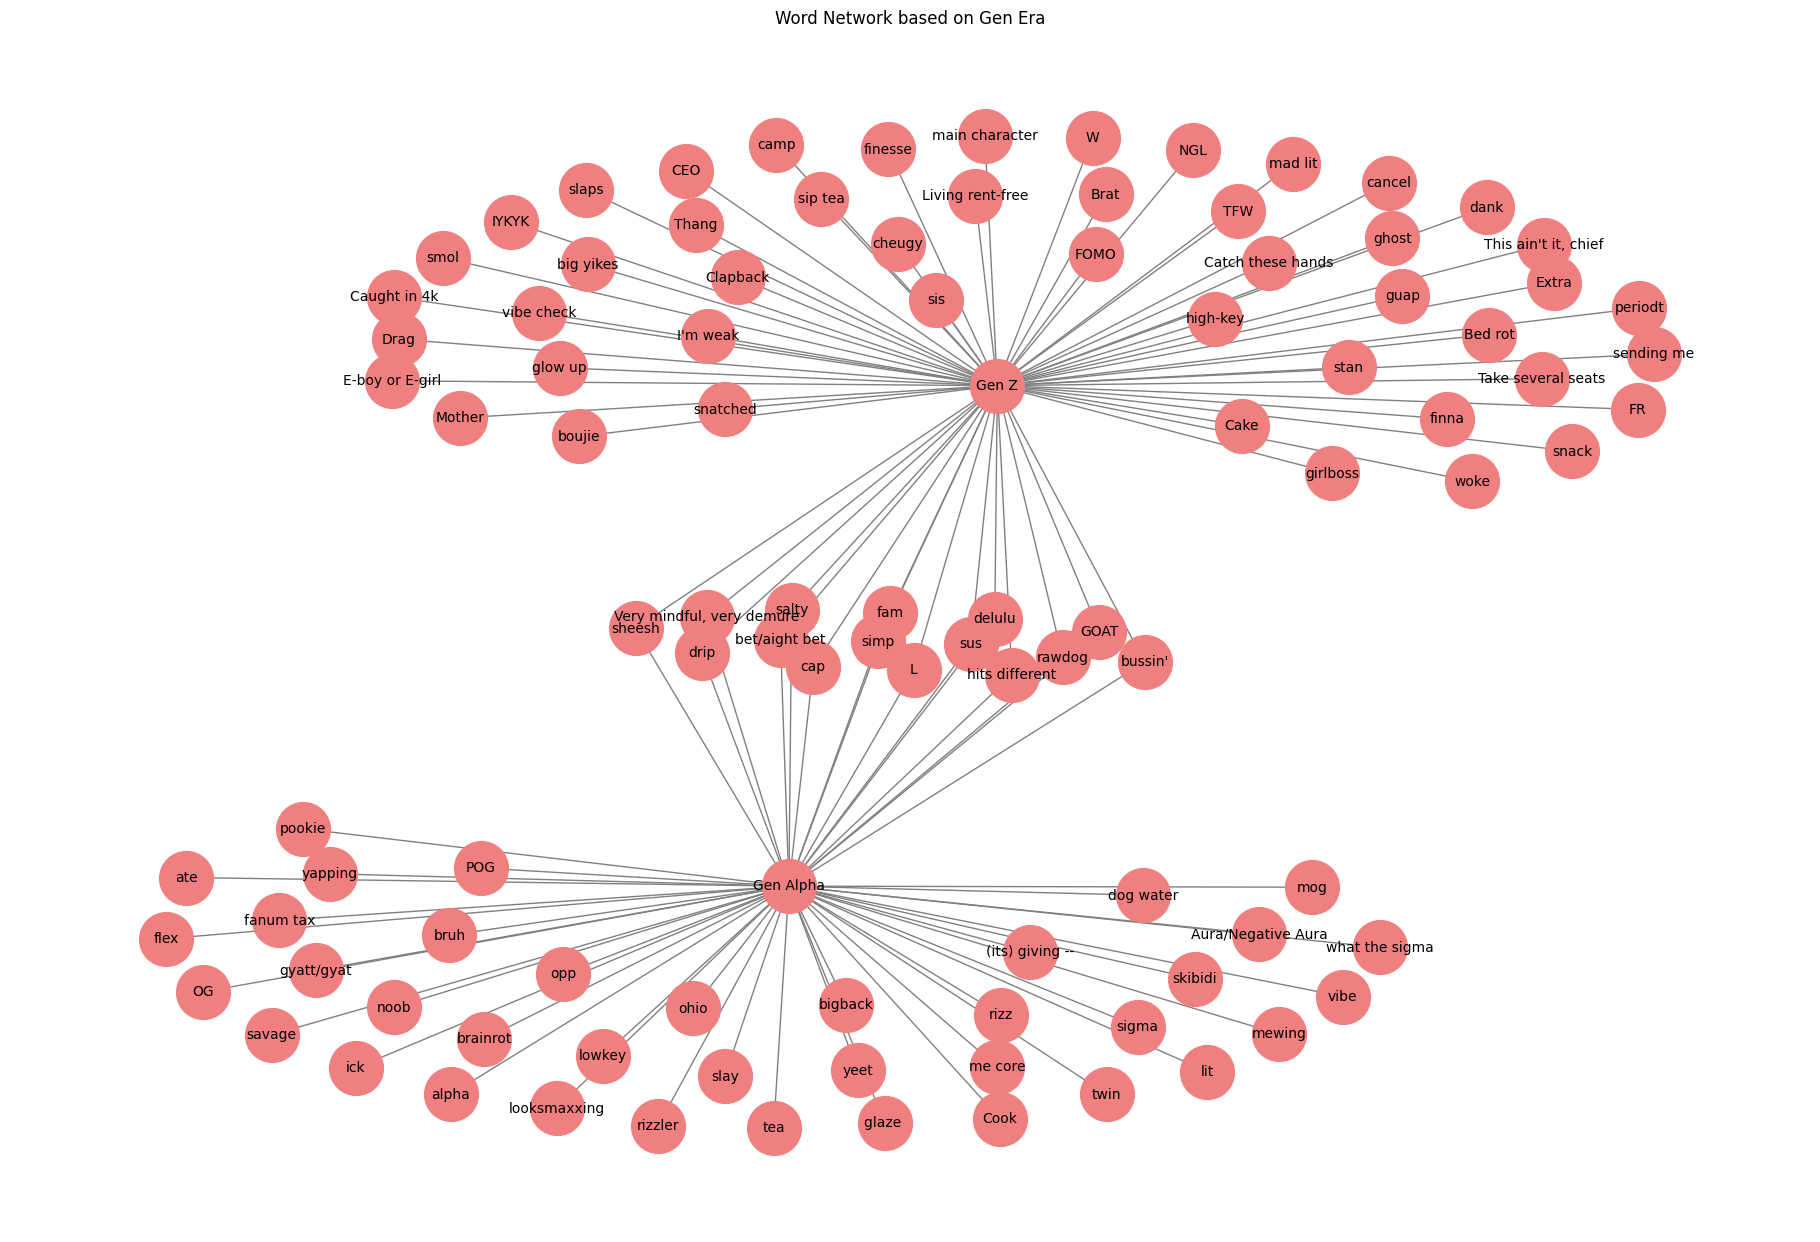

In [ ]:
# Create the graph
G_gen_era = nx.Graph()

for _, row in subset.iterrows():
    slang = row['Slang/Phrase']
    gen_era = row['Gen Era']

    if gen_era == "Both":
        # If the label is "Both", connect the slang to both "Gen Z" and "Gen Alpha"
        G_gen_era.add_edge("Gen Z", slang)
        G_gen_era.add_edge("Gen Alpha", slang)
    else:
        # Otherwise, connect the slang to its respective generation
        G_gen_era.add_edge(gen_era, slang)

# Draw the Gen Era subgraph
plt.figure(figsize=(18, 12))
pos_gen_era = nx.spring_layout(G_gen_era, seed=42, k=0.2)
nx.draw(
    G_gen_era, pos_gen_era,
    with_labels=True,
    node_size=1500,
    font_size=10,
    node_color="lightcoral",
    edge_color="gray"
)
plt.title("Word Network based on Gen Era")
plt.show()


#### Subgraph for Origin connections

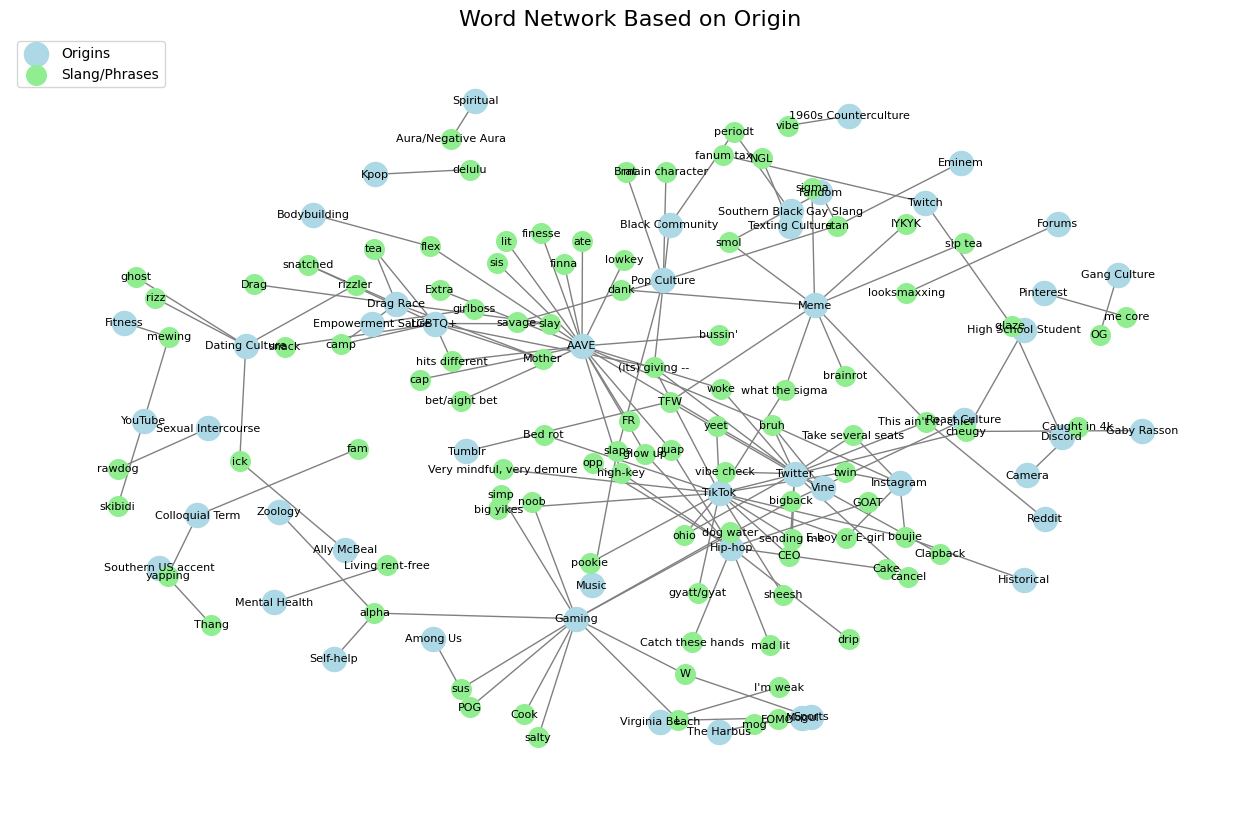

In [ ]:
# Create the graph
G_origin = nx.Graph()

# Add edges for Origin and Slang
for _, row in subset.iterrows():
    slang = row['Slang/Phrase']
    origins = row['Origin_Key'].split(',')  # Handle multiple origins
    for origin in origins:
        G_origin.add_edge(origin.strip(), slang)

# Draw the Origin subgraph
plt.figure(figsize=(16, 10))
pos_origin = nx.spring_layout(G_origin, seed=43, k=0.3)  # Increase spacing with k

# Separate origins and slangs for styling
origin_nodes = [node for node in G_origin if node in subset['Origin_Key'].str.split(',').explode().str.strip().unique()]
slang_nodes = [node for node in G_origin if node not in origin_nodes]

# Draw the nodes with different colors for Origin and Slang
nx.draw_networkx_nodes(
    G_origin,
    pos_origin,
    nodelist=origin_nodes,
    node_color="lightblue",
    node_size=300,
    label="Origins"
    )

nx.draw_networkx_nodes(
    G_origin,
    pos_origin,
    nodelist=slang_nodes,
    node_color="lightgreen",
    node_size=200,
    label="Slang/Phrases"
    )

# Draw edges
nx.draw_networkx_edges(G_origin, pos_origin, edge_color="gray")

# Add labels with better scaling
nx.draw_networkx_labels(G_origin, pos_origin, font_size=8)

# Title and legend
plt.title("Word Network Based on Origin", fontsize=16)
plt.legend(scatterpoints=1, loc="upper left", fontsize=10)
plt.axis("off")  # Turn off axis
plt.show()


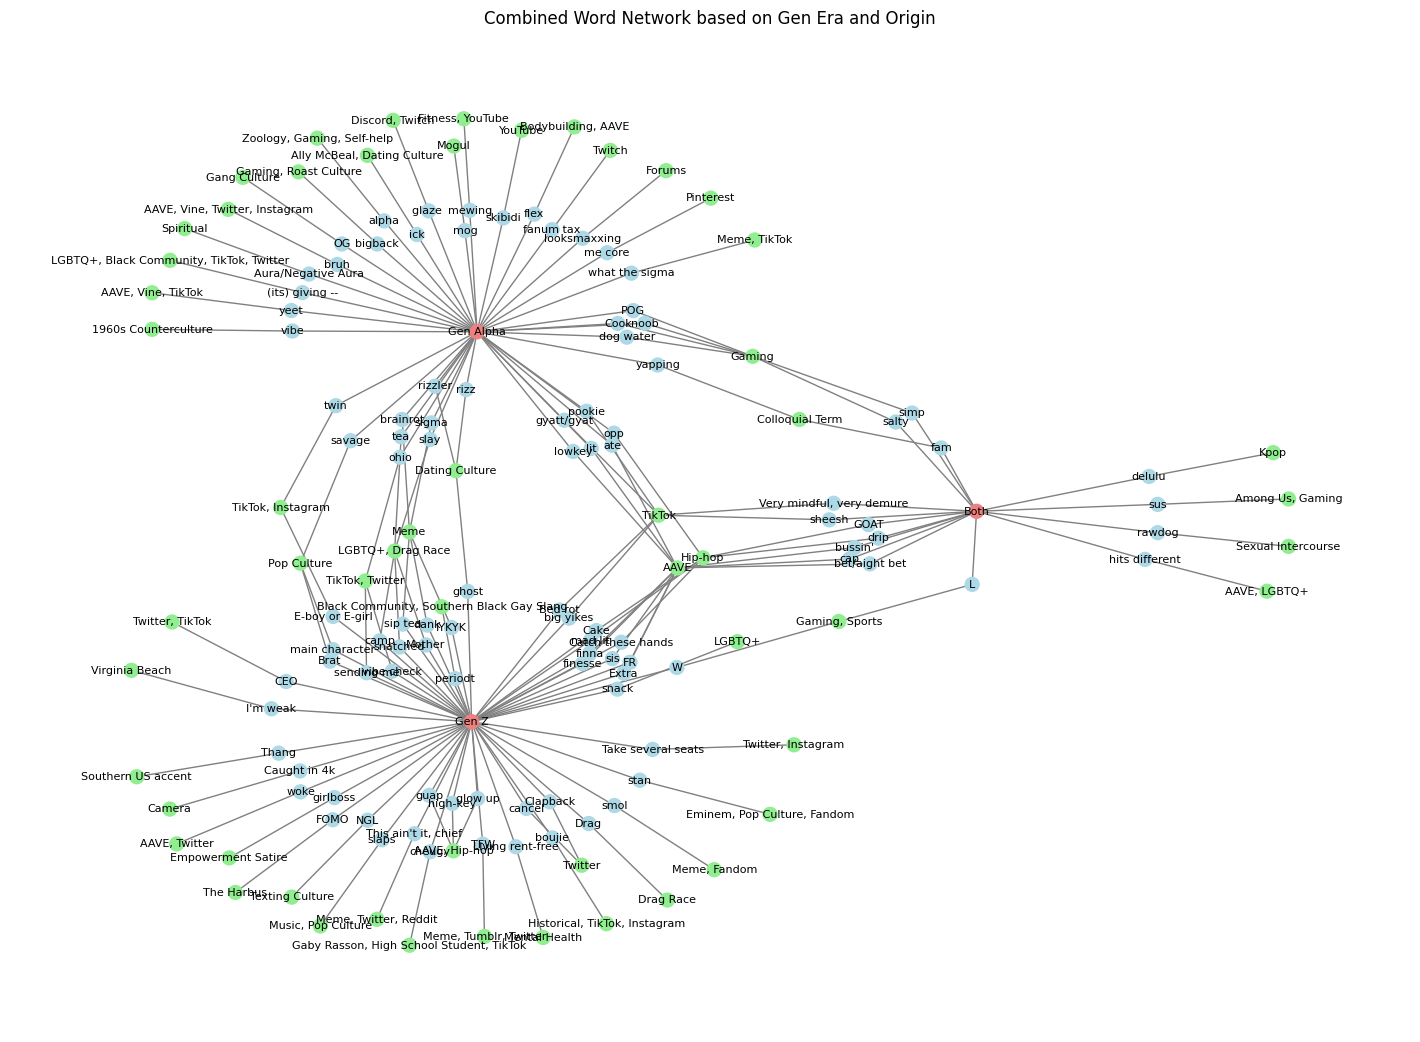

In [18]:
# Initialize a graph
G = nx.Graph()

# Add nodes and edges for Gen Era and Origin
for _, row in subset.iterrows():
    slang = row['Slang/Phrase']
    gen_era = row['Gen Era']
    origin = row['Origin_Key']

    # Add edges connecting slang to Gen Era and Origin
    G.add_edge(gen_era, slang, category='Gen Era')
    G.add_edge(origin, slang, category='Origin')

# Assign colors to distinguish Gen Era and Origin nodes
color_map = []
for node in G.nodes():
    if node in subset['Gen Era'].values:
        color_map.append('lightcoral')  # Color for Gen Era nodes
    elif node in subset['Origin_Key'].values:
        color_map.append('lightgreen')  # Color for Origin nodes
    else:
        color_map.append('lightblue')  # Color for slang nodes

# Draw the combined graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(
    G, pos,
    with_labels=True,
    node_size=100,
    font_size=8,
    node_color=color_map,
    edge_color="gray"
)
plt.title("Combined Word Network based on Gen Era and Origin")
plt.show()

In [20]:
# Initialize a Dash app
app = Dash(__name__)

# Initialize a graph
G = nx.Graph()

# Add nodes and edges for Gen Era and Origin
for _, row in subset.iterrows():
    slang = row['Slang/Phrase']
    gen_era = row['Gen Era']
    origin = row['Origin_Key']

    # Add edges for Gen Era
    if gen_era == "Both":
        G.add_edge("Gen Z", slang, category='Gen Era')
        G.add_edge("Gen Alpha", slang, category='Gen Era')
    else:
        G.add_edge(gen_era, slang, category='Gen Era')

    # Add edges for each origin (split by commas)
    origins = [o.strip() for o in origin.split(",")]  # Split and trim whitespace
    for individual_origin in origins:
        G.add_edge(individual_origin, slang, category='Origin')

# Create a Plotly figure for visualization
def create_figure(G):
    pos = nx.spring_layout(G, seed=42)  # Calculate positions for nodes

    # Extract node data for Plotly
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    node_x = []
    node_y = []
    node_labels = []
    node_colors = []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_labels.append(node)

        # Assign colors to nodes
        if node in subset['Gen Era'].unique():
            node_colors.append('lightcoral')  # Gen Era nodes
        elif any(node in o for o in subset['Origin_Key'].unique()):
            node_colors.append('lightgreen')  # Origin nodes
        else:
            node_colors.append('lightblue')  # Slang nodes

    # Create edge trace
    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines'
    )

    # Create node trace
    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers+text',
        text=node_labels,
        textposition="top center",
        marker=dict(
            size=10,
            color=node_colors,
            line=dict(width=2, color='black')
        )
    )

    # Combine traces
    fig = go.Figure(data=[edge_trace, node_trace])
    fig.update_layout(
        showlegend=False,
        hovermode='closest',
        title="Interactive Word Network",
        titlefont_size=16,
        margin=dict(b=0, l=0, r=0, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
    return fig

# Build the Dash layout
app.layout = html.Div([
    html.H1("Word Network Dashboard", style={'text-align': 'center', 'background': 'white'}),
    dcc.Graph(id='network-graph', figure=create_figure(G))
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

### Count frequencies for Gen Era and Origin

In [ ]:
# Split 'Origin_Key' by commas and expand to rows
subset_expanded = subset.assign(
    Origin_Key=subset['Origin_Key'].str.split(',')).explode('Origin_Key')

# Remove extra whitespace from Origin_Key after splitting
subset_expanded['Origin_Key'] = subset_expanded['Origin_Key'].str.strip()

# Recalculate counts for Gen Era and Origin_Key
gen_era_counts = subset_expanded['Gen Era'].value_counts()
origin_counts = subset_expanded['Origin_Key'].value_counts()

# Print the results without headers
print("Gen Era Counts:")
for index, value in gen_era_counts.items():
    print(f"{index:10} {value}")

print("\nOrigin Counts:")
for index, value in origin_counts.items():
    print(f"{index:10} {value}")


Gen Era Counts:
Gen Z      74
Gen Alpha  58
Both       18

Origin Counts:
AAVE       19
TikTok     17
Twitter    12
Gaming     11
Hip-hop    9
Meme       9
LGBTQ+     8
Drag Race  6
Instagram  5
Pop Culture 5
Dating Culture 4
Sports     2
Vine       2
YouTube    2
Fandom     2
Black Community 2
Colloquial Term 2
Twitch     2
Tumblr     1
Gang Culture 1
Fitness    1
Mogul      1
Texting Culture 1
Southern Black Gay Slang 1
Among Us   1
Sexual Intercourse 1
Music      1
Forums     1
Reddit     1
Southern US accent 1
Eminem     1
Pinterest  1
The Harbus 1
Mental Health 1
Ally McBeal 1
Virginia Beach 1
Discord    1
Empowerment Satire 1
Bodybuilding 1
Kpop       1
High School Student 1
Gaby Rasson 1
Camera     1
Historical 1
Roast Culture 1
Spiritual  1
Self-help  1
Zoology    1
1960s Counterculture 1


#### Plot Origin frequencies


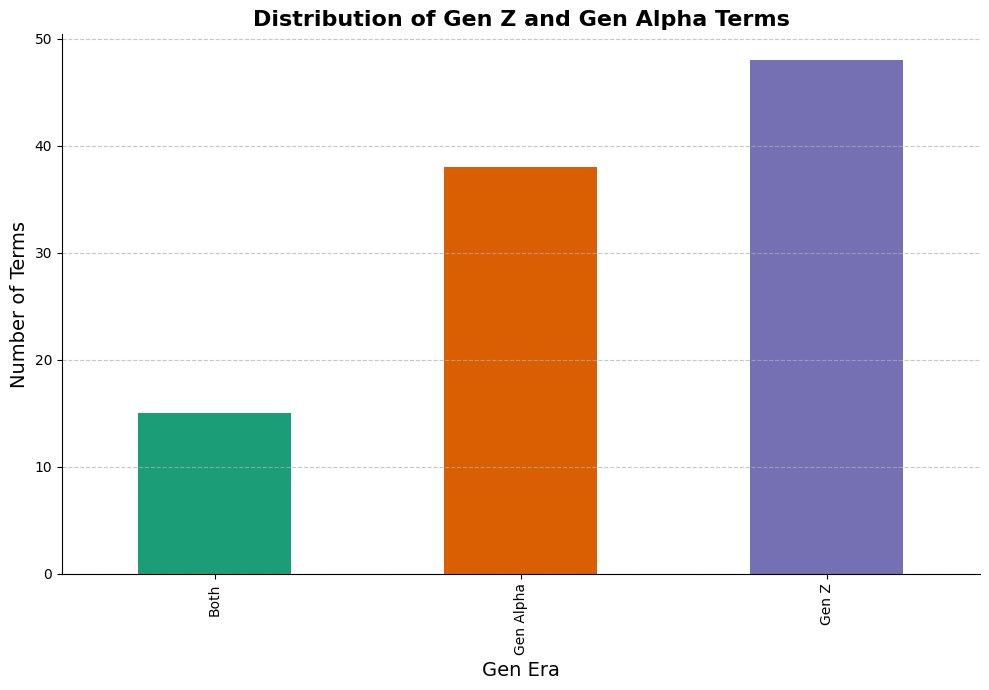

In [ ]:
# @title Gen Era - Vertical Bar Chart with Percentages

# Group by 'Gen Era' and count the number of terms in each category
gen_counts = df.groupby('Gen Era').size()

# Calculate percentage for each category
total_terms = gen_counts.sum()
gen_percentages = (gen_counts / total_terms) * 100

# Plotting the vertical bar chart
ax = gen_counts.plot(kind='bar',
                     color=sns.color_palette('Dark2', n_colors=len(gen_counts)),
                     figsize=(10, 7), width=0.5)

# Remove top and right spines for a cleaner look
ax.spines[['top', 'right']].set_visible(False)

# Add title and labels with better readability
plt.title("Distribution of Gen Z and Gen Alpha Terms", fontsize=16, weight='bold')
plt.ylabel("Number of Terms", fontsize=14)
plt.xlabel("Gen Era", fontsize=14)

# Annotate bars with their respective values and percentage
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_terms) * 100
    ax.annotate(f'{height:,.0f} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height() + 50),  # Adjust for vertical position
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Add gridlines for better visual clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


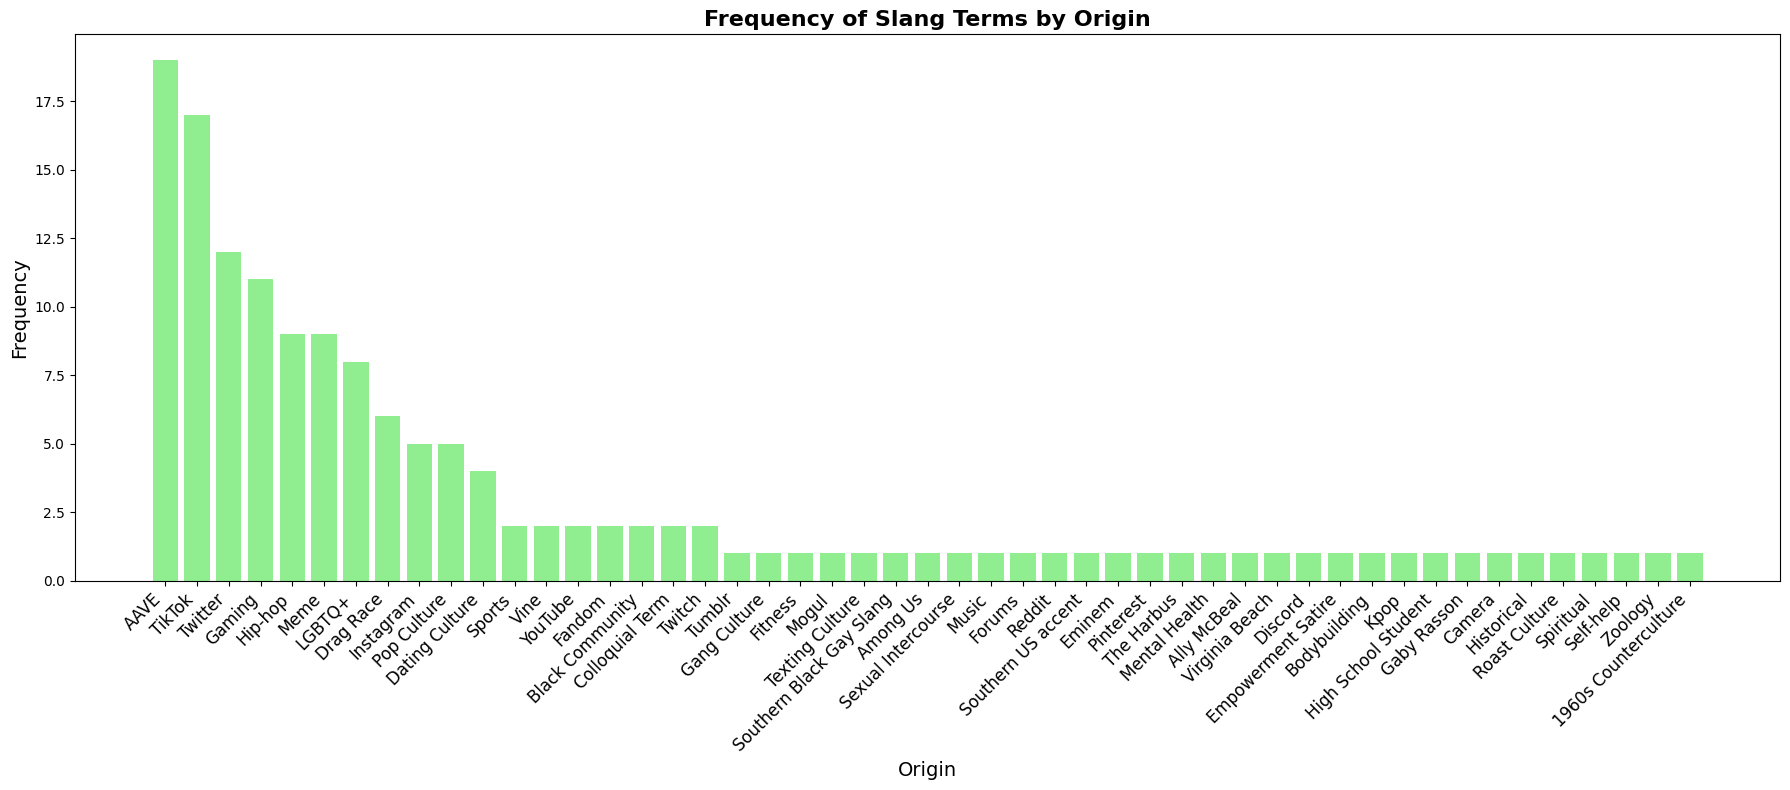

In [ ]:
# Splitting entries with commas into separate rows for 'Origin_Key'
expanded_data = subset['Origin_Key'].str.split(',').explode().str.strip()

# Recomputing origin counts for the cleaned data
origin_counts = expanded_data.value_counts()

# Plotting the corrected data
plt.figure(figsize=(18, 8))  # Increase figure size for more space
plt.bar(origin_counts.index, origin_counts.values, color='lightgreen')

# Title and labels
plt.title("Frequency of Slang Terms by Origin", fontsize=16, weight='bold')
plt.xlabel("Origin", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Rotate X-axis labels and adjust spacing
plt.xticks(rotation=45, ha='right', fontsize=12)

# Improve layout to avoid label overlap
plt.tight_layout()

# Show plot
plt.show()
